## Complete Practice Notebook with all codes for Machine Learning Lab

Code credits: [Mudit Golchha](https://github.com/mudit2004)

### ALL PACKAGES

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from hmmlearn import hmm
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2 , l1
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras import models, datasets
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix , precision_score , recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score


### Convert .data to .csv

In [ ]:
# URL to the Iris dataset in .data format
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Read the dataset into a DataFrame
data = read_csv(url, header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Specify the path where you want to save the .csv file
csv_path = "iris.csv"

# Write the DataFrame to a .csv file
data.to_csv(csv_path, index=False)

In [ ]:
# Column names for the Iris dataset
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Target']

df = read_csv("iris.csv" , names=column_names)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,0.0,1.0,2.0,3.0,4
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


### EDA

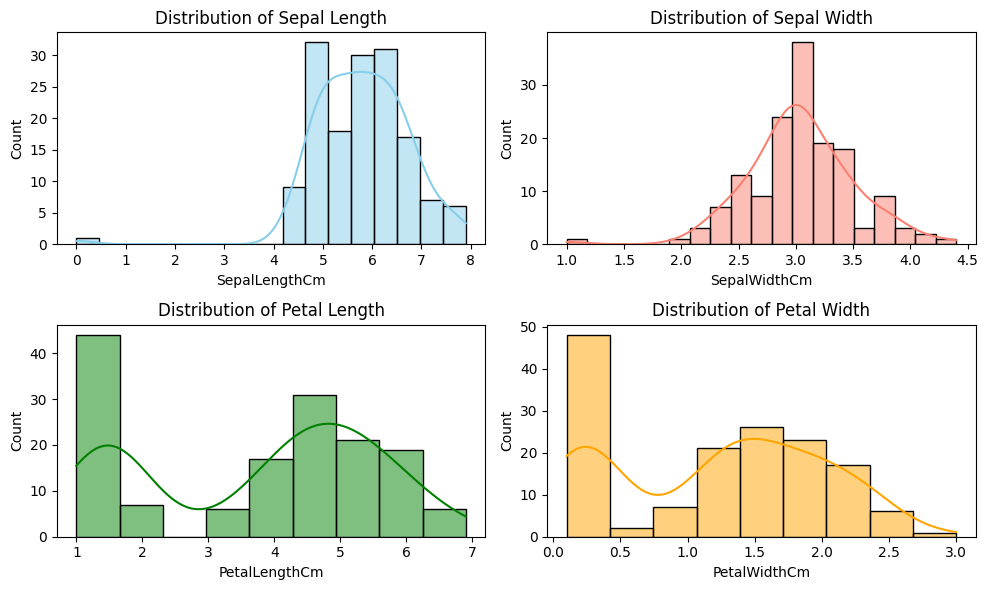

In [ ]:
# Visualize the distribution of each feature
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['SepalLengthCm'], kde=True, color='skyblue')
plt.title('Distribution of Sepal Length')

plt.subplot(2, 2, 2)
sns.histplot(df['SepalWidthCm'], kde=True, color='salmon')
plt.title('Distribution of Sepal Width')

plt.subplot(2, 2, 3)
sns.histplot(df['PetalLengthCm'], kde=True, color='green')
plt.title('Distribution of Petal Length')

plt.subplot(2, 2, 4)
sns.histplot(df['PetalWidthCm'], kde=True, color='orange')
plt.title('Distribution of Petal Width')

plt.tight_layout()
plt.show()

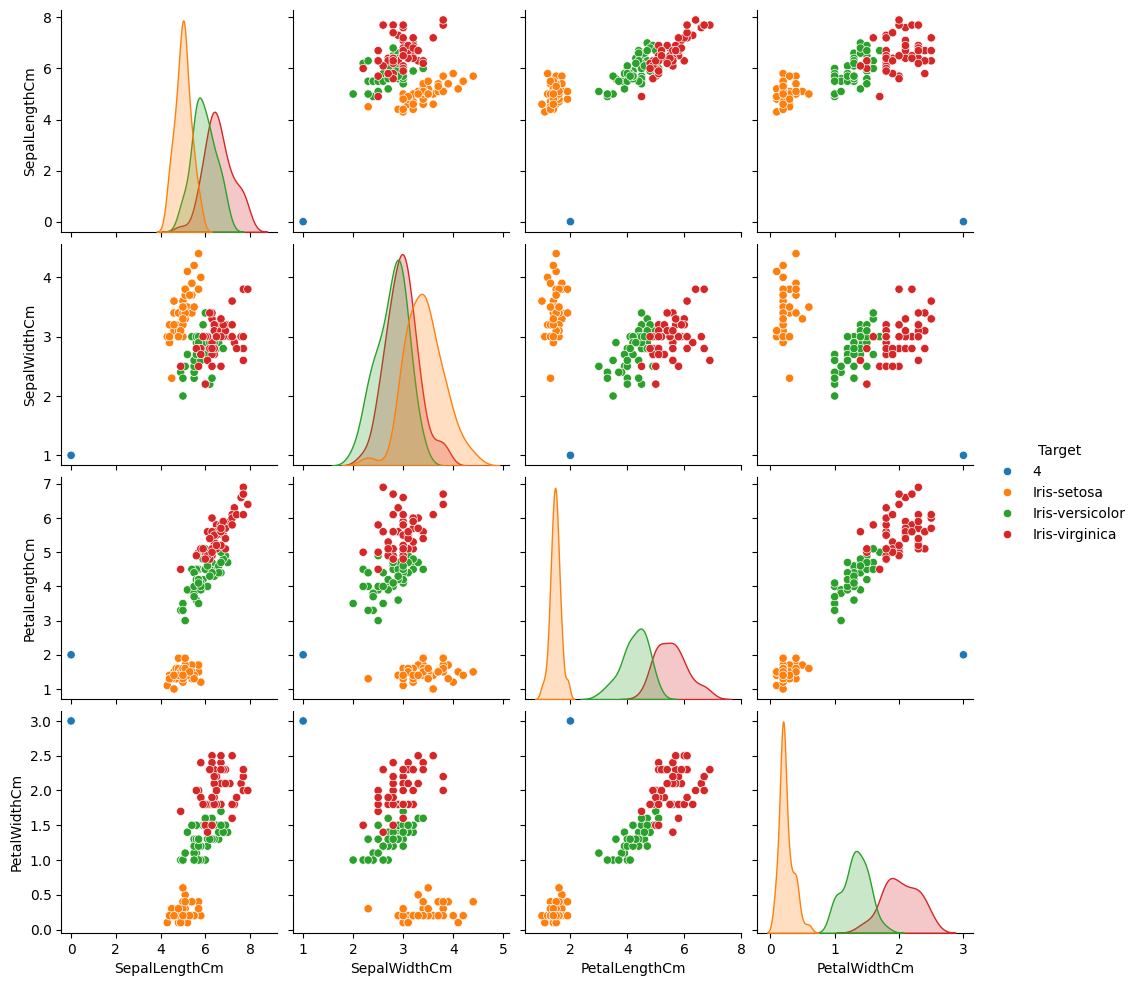

In [ ]:
# Explore relationships between different features
sns.pairplot(df, hue='Target', diag_kind='kde')
plt.show()

### PCA

In [ ]:
# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Print PCA components
print("PCA Components:\n", pca.components_)

PCA Components:
 [[ 0.48760494 -0.2433764   0.6091998   0.57609456]
 [-0.50540552 -0.8571106  -0.02824309  0.0955458 ]
 [-0.61040134  0.43264369  0.03483167  0.66258312]
 [-0.36635622  0.13765456  0.79174787 -0.46900923]]


/var/folders/3p/qnfnsq9d1297__xtztvm4v640000gn/T/ipykernel_24129/1769283823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, len(pca.explained_variance_ratio_)+1)), y=pca.explained_variance_ratio_, palette='viridis')


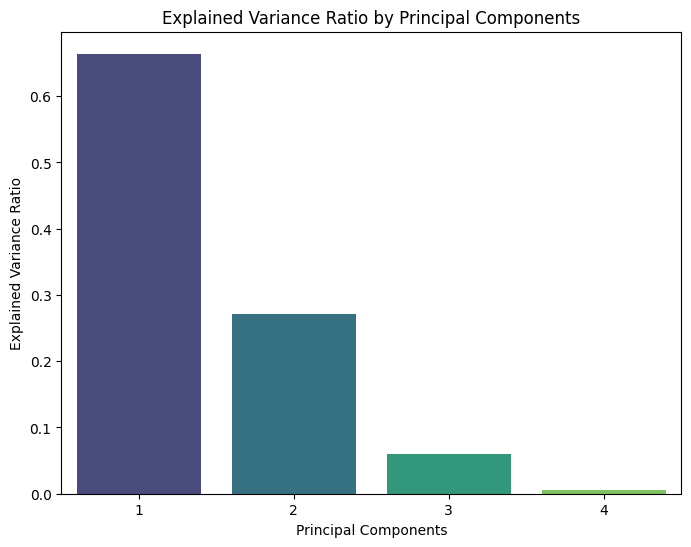

In [ ]:
# Visualize explained variance ratio
plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, len(pca.explained_variance_ratio_)+1)), y=pca.explained_variance_ratio_, palette='viridis')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

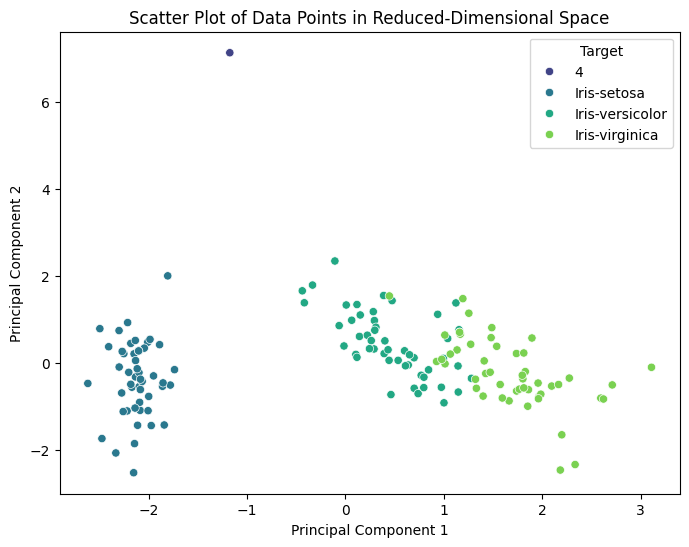

In [ ]:
# Plot scatter plot of data points in reduced-dimensional space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Data Points in Reduced-Dimensional Space')
plt.legend(title='Target')
plt.show()

### LDA

In [ ]:
# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply LDA
lda = LDA()
X_lda = lda.fit_transform(X_scaled, y)

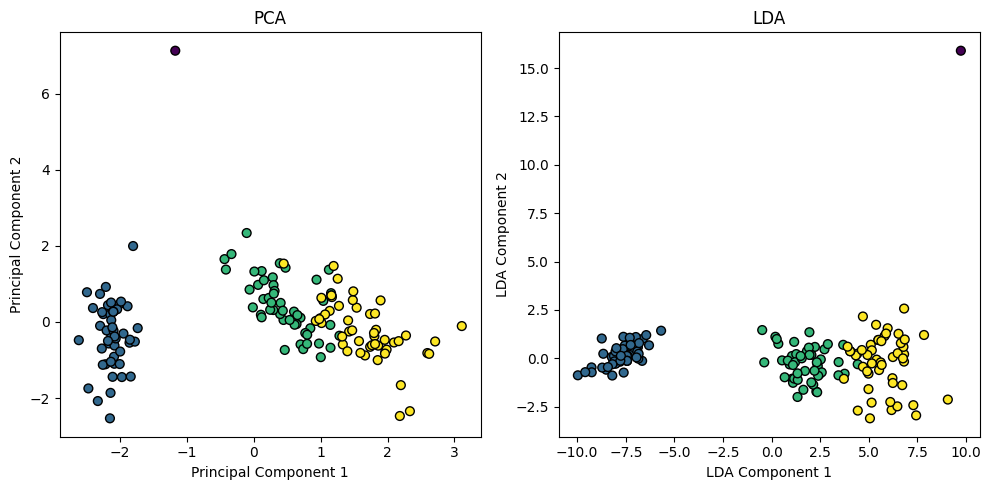

In [ ]:
# Plot before and after LDA
plt.figure(figsize=(10, 5))

# Before LDA
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype('category').cat.codes, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# After LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y.astype('category').cat.codes, cmap='viridis', edgecolor='k', s=40)
plt.title('LDA')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')

plt.tight_layout()
plt.show()

### KNN

In [ ]:
# Use only the specified columns
selected_columns = ['SepalLengthCm', 'SepalWidthCm']
X = df[selected_columns].values
# Change target to binary classification (1 for 'Iris-setosa', 0 for others)
y = df['Target'].apply(lambda x: 1 if x == 'Iris-setosa' else 0).values

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Visualize the decision boundaries using meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

In [ ]:
# Create a KNN classifier with k=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

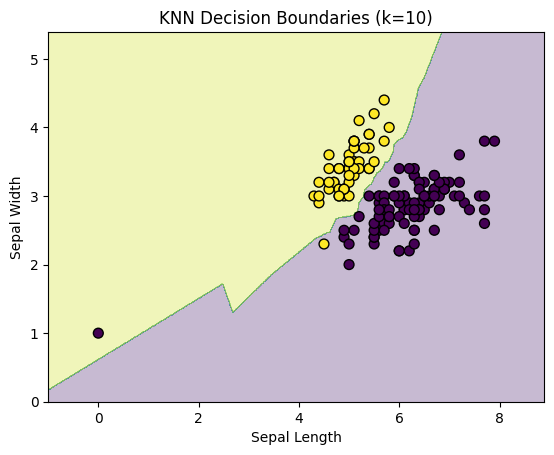

In [ ]:
# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title('KNN Decision Boundaries (k=10)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
# Print performance metrics
print("\nPerformance Metrics for KNN (k=10):")
print(classification_report(y_test, knn.predict(X_test)))


Performance Metrics for KNN (k=10):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



### Linear Regression

In [ ]:
# Let's use SepalLengthCm as our independent variable (X) and SepalWidthCm as our dependent variable (y)
X = df['SepalLengthCm'].values
y = df['SepalWidthCm'].values

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize parameters
beta0 = 0  # intercept
beta1 = 0  # slope

In [ ]:
# Define hyperparameters
learning_rate = 0.01
epochs = 1000

In [ ]:
# Define the cost function (Mean Squared Error)
def compute_cost(X, y, beta0, beta1):
    n = len(y)
    y_pred = beta0 + beta1 * X
    cost = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)
    return cost

In [ ]:
# Perform gradient descent to optimize beta values
cost_history = []
for epoch in range(epochs):
    # Compute predicted values
    y_pred = beta0 + beta1 * X_train

    # Compute gradients
    grad_beta0 = (1 / len(y)) * np.sum(y_pred - y_train)
    grad_beta1 = (1 / len(y)) * np.sum((y_pred - y_train) * X_train)

    # Update beta values
    beta0 -= learning_rate * grad_beta0
    beta1 -= learning_rate * grad_beta1

    # Compute and store cost
    cost = compute_cost(X, y, beta0, beta1)
    cost_history.append(cost)

In [ ]:
# Print optimized beta values
print("Optimized beta values:")
print("beta0:", beta0)
print("beta1:", beta1)

Optimized beta values:
beta0: 0.597109228816601
beta1: 0.4092896108373016


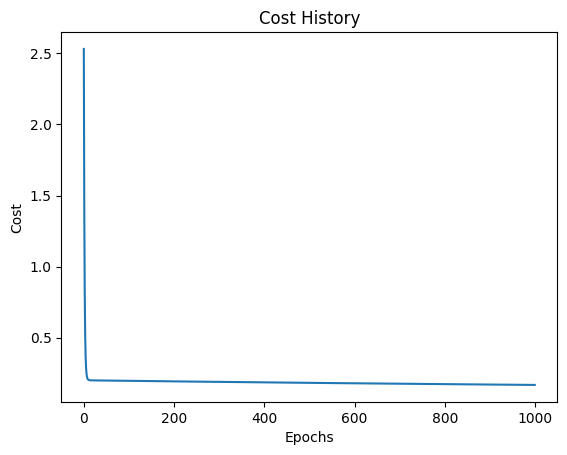

In [ ]:
# Plot cost history
plt.plot(range(epochs), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

In [ ]:
# Compute predictions
y_pred = beta0 + beta1 * X_test

# Compute evaluation metrics using scikit-learn
mse_sklearn = mean_squared_error(y_test, y_pred)
mae_sklearn = mean_absolute_error(y_test, y_pred)
r2_sklearn = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics :")
print("Mean Squared Error (MSE):", mse_sklearn)
print("Mean Absolute Error (MAE):", mae_sklearn)
print("R-squared (R2) Score:", r2_sklearn)

Evaluation Metrics :
Mean Squared Error (MSE): 0.26854667850940056
Mean Absolute Error (MAE): 0.4430518110834805
R-squared (R2) Score: -0.8386531636330437


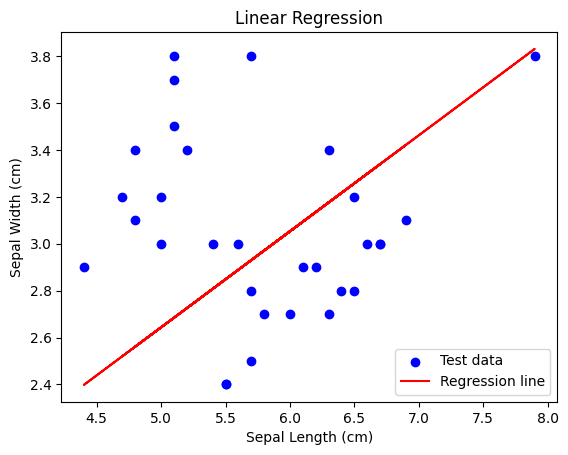

In [ ]:
# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Linear Regression')
plt.legend()
plt.show()

### Logistic Regression

In [ ]:
# Load dataset
data = pd.read_csv('framingham.csv')

In [ ]:
data.fillna(data.mean(), inplace=True)
print(data.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(1e6, inplace=True)

In [ ]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)

# Check for values too large for float64 dtype
print("Max values in dataset:")
print(data.max())

Max values in dataset:
male                 1.0
age                 70.0
education            4.0
currentSmoker        1.0
cigsPerDay          70.0
BPMeds               1.0
prevalentStroke      1.0
prevalentHyp         1.0
diabetes             1.0
totChol            696.0
sysBP              295.0
diaBP              142.5
BMI                 56.8
heartRate          143.0
glucose            394.0
TenYearCHD           1.0
dtype: float64


In [ ]:
# Data preprocessing
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[718   6]
 [115   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



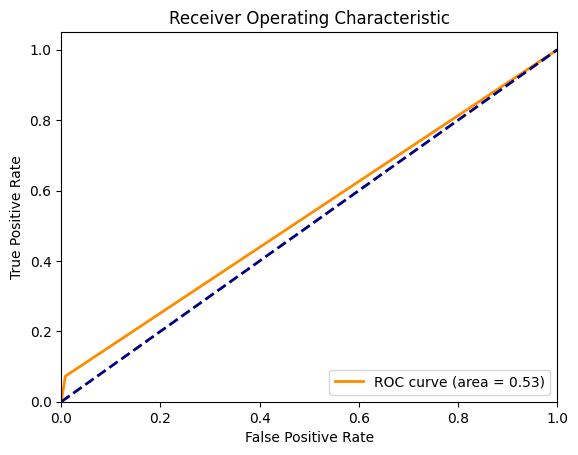

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

In [ ]:
# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict the target values for the test set
y_pred = gnb.predict(X_test)

In [ ]:
# Print performance metrics
print("Naive Bayes (Gaussian) Performance Metrics:")
print(classification_report(y_test, y_pred))

Naive Bayes (Gaussian) Performance Metrics:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.94        31
      macro avg       0.94      0.94      0.93        31
   weighted avg       0.95      0.94      0.94        31



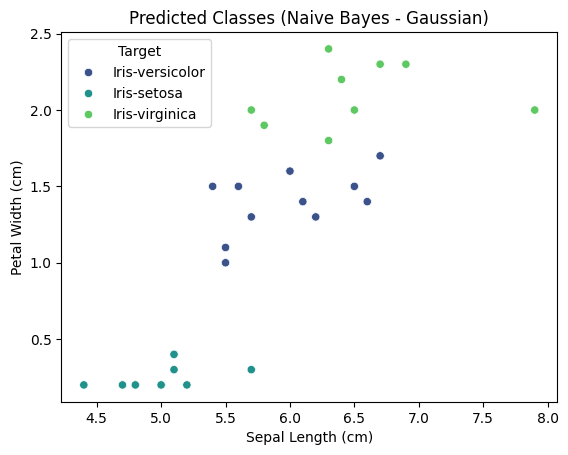

In [ ]:
# Plot a simple visualization
sns.scatterplot(x=X_test['SepalLengthCm'], y=X_test['PetalWidthCm'], hue=y_test, palette='viridis')
plt.title('Predicted Classes (Naive Bayes - Gaussian)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Target')
plt.show()

### SVM - Linear

In [ ]:
df = pd.read_csv(r"diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df['Outcome'] = df['Outcome'].replace({0: -1, 1: 1})

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [ ]:
# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# Making predictions
predictions = svm_model.predict(X_test)

In [ ]:
# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

# Generating a classification report
report = classification_report(y_test, predictions, target_names=['Class 1', 'Class -1'])

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

     Class 1       0.81      0.81      0.81        99
    Class -1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



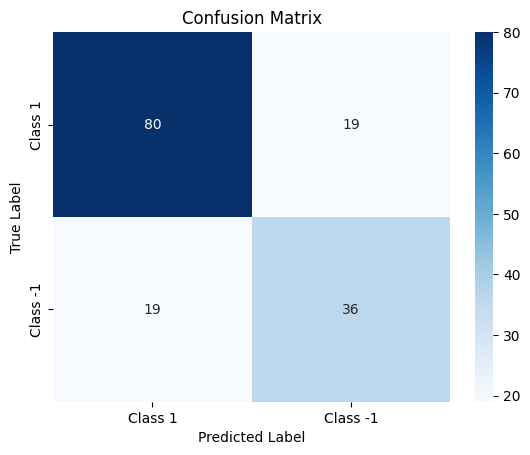

In [ ]:
# Plotting the confusion matrix as a heatmap
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 1', 'Class -1'], yticklabels=['Class 1', 'Class -1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### SVM - Non Linear

In [ ]:
email_rec = pd.read_csv("Spam.txt",  sep = ',', header= None )
print(email_rec.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


In [ ]:
# renaming the columns
email_rec.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average",
                      "capital_run_length_longest", "capital_run_length_total", "spam"]

In [ ]:
# Define X and y values
X = email_rec.drop("spam", axis = 1)
y = email_rec.spam.values.astype(int)

In [ ]:
X = scale(X)

In [ ]:
# Split the Dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [ ]:
# Using rbf kernel, C=100 and gamma = 0.0001, default value of gamma

model_rbf = SVC(C=100, gamma=0.0001, kernel="rbf")
model_rbf.fit(X_train, y_train)
y_pred = model_rbf.predict(X_test)

#### The below are other kernel function
```code
model_poly = SVC(C=100, degree = 3, kernel="poly")
model_poly.fit(X_train, y_train)
y_pred = model_poly.predict(X_test)

model_sigmoid = SVC(C=1, kernel="sigmoid")
model_sigmoid.fit(X_train, y_train)
y_pred = model_sigmoid.predict(X_test)
```

In [ ]:
#Print the Preformance metrics report

print(confusion_matrix(y_test, y_pred), "\n")
print("Accuracy : ",accuracy_score(y_test, y_pred))
print("\nPrecision : ",precision_score(y_test, y_pred))
print("\nsensitivity/Recall : ",recall_score(y_test, y_pred))

[[810  39]
 [ 60 472]] 

Accuracy :  0.9283128167994207

Precision :  0.923679060665362

sensitivity/Recall :  0.8872180451127819


### Feed Forward NN

In [ ]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Preprocess the data
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Convert labels to one-hot vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Define the model
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [ ]:
# Compile the model
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
# Train the model
model.fit(
  train_images,
  train_labels,
  epochs=1,
  batch_size=32,
)

1875/1875 [==============================] - 2s 866us/step - loss: 0.3510 - accuracy: 0.8943


In [ ]:
# Evaluate the model
model.evaluate(
  test_images,
  test_labels
)

313/313 [==============================] - 0s 570us/step - loss: 0.2165 - accuracy: 0.9322


[0.21649402379989624, 0.932200014591217]

In [ ]:
# Predict the labels for test data
pred_probs = model.predict(test_images)

313/313 [==============================] - 0s 522us/step


In [ ]:
# Get the class with the highest probability
pred_labels = np.argmax(pred_probs, axis=1)

# Convert test labels back to original form
test_labels_orig = np.argmax(test_labels, axis=1)

In [ ]:
# Generate the classification report
report = classification_report(test_labels_orig, pred_labels)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.93      0.95      1032
           3       0.98      0.82      0.89      1010
           4       0.92      0.95      0.93       982
           5       0.91      0.90      0.91       892
           6       0.97      0.93      0.95       958
           7       0.93      0.96      0.94      1028
           8       0.81      0.96      0.88       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



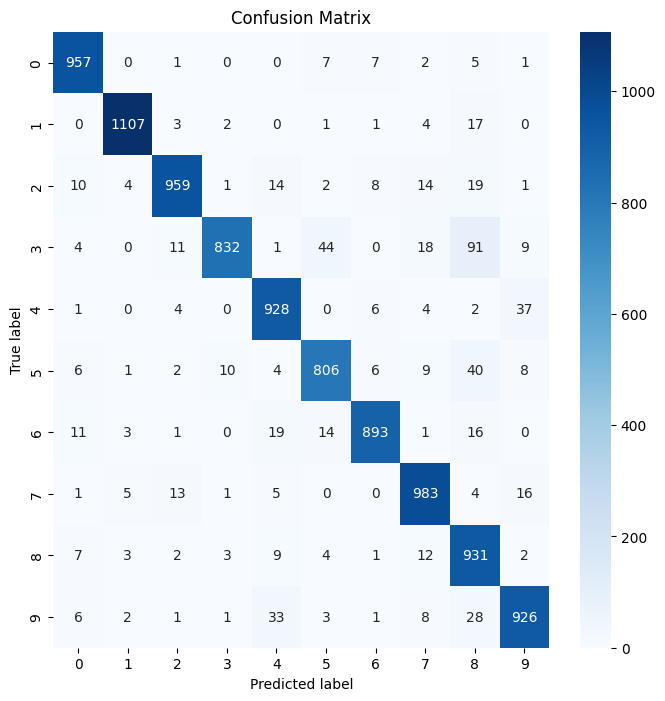

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels_orig, pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### Feed Forward NN with Regularization

In [ ]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Preprocess the data
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Convert labels to one-hot vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Define the model without regularization
model_no_reg = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [ ]:
# Compile the model
model_no_reg.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
# Train the model without regularization
history_no_reg = model_no_reg.fit(
  train_images,
  train_labels,
  epochs=5,
  batch_size=32,
  verbose=0
)

In [ ]:
# Define the model with L2 regularization
model_l2_reg = Sequential([
  Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(784,)),
  Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
  Dense(10, activation='softmax'),
])

In [ ]:
# Compile the model
model_l2_reg.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
history_l2_reg = model_l2_reg.fit(
  train_images,
  train_labels,
  epochs=5,
  batch_size=32,
  verbose=0
)

#### The below are the code for L1 and dropout regularization
```
model_l1_reg = Sequential([
  Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(784,)),
  Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
  Dense(10, activation='softmax'),
])

model_dropout = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax'),
])
```
#### **Note : For dropout , we have to import it from the a separate library , "from keras.layers import Dropout"**

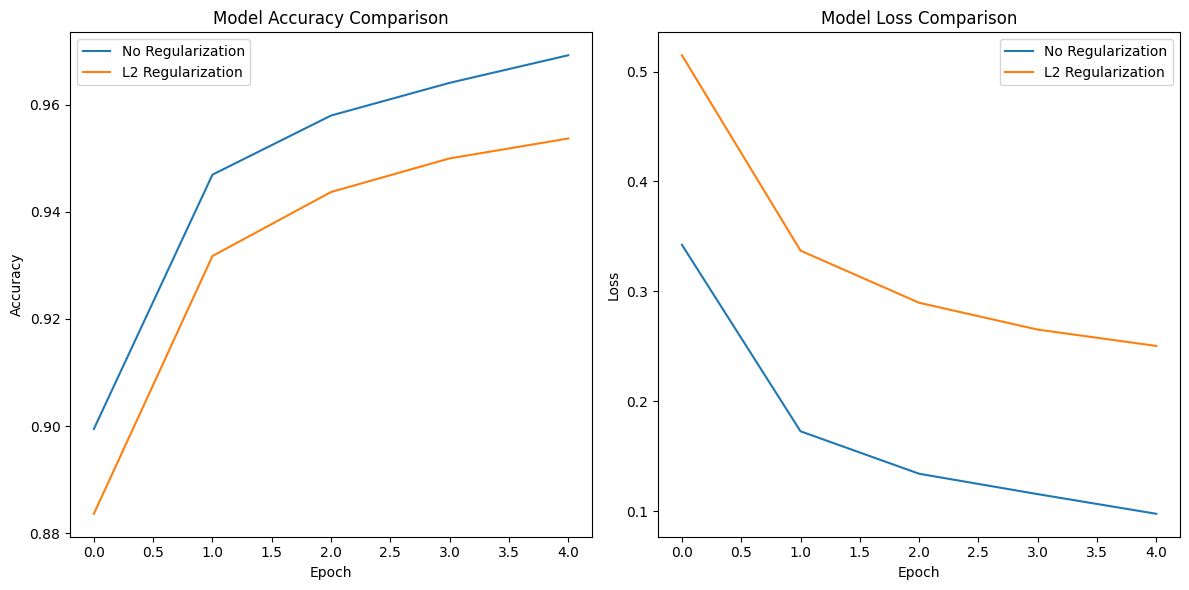

In [ ]:
# Plotting the comparison
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_no_reg.history['accuracy'], label='No Regularization')
plt.plot(history_l2_reg.history['accuracy'], label='L2 Regularization')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_no_reg.history['loss'], label='No Regularization')
plt.plot(history_l2_reg.history['loss'], label='L2 Regularization')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### CNN

In [ ]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Define the CNN model
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0884 - accuracy: 0.6162 - val_loss: 1.0248 - val_accuracy: 0.6342
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9810 - accuracy: 0.6558 - val_loss: 0.9796 - val_accuracy: 0.6547
Epoch 3/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8955 - accuracy: 0.6855 - val_loss: 0.9394 - val_accuracy: 0.6815
Epoch 4/5
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8285 - accuracy: 0.7103 - val_loss: 0.9746 - val_accuracy: 0.6538
Epoch 5/5
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7717 - accuracy: 0.7307 - val_loss: 0.9176 - val_accuracy: 0.6769


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 6ms/step - loss: 0.9176 - accuracy: 0.6769
Test accuracy: 0.6769000291824341


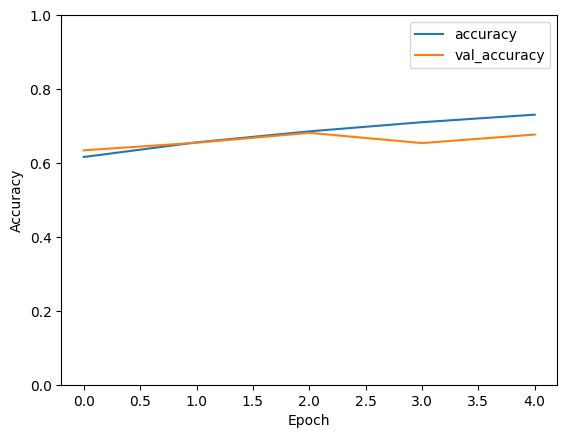

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

### Hidden Markov Model - Forward and Backward

In [ ]:
def forward_algorithm(obs_seq, start_prob, trans_prob, emit_prob):
    # Initialize alpha matrix
    alpha = np.zeros((len(obs_seq), trans_prob.shape[0]))

    # Initialize alpha at t=0
    alpha[0] = start_prob * emit_prob[:, obs_seq[0]]

    # Recursion step
    for t in range(1, len(obs_seq)):
        for j in range(trans_prob.shape[0]):
            alpha[t, j] = np.sum(alpha[t - 1] * trans_prob[:, j] * emit_prob[j, obs_seq[t]])

    return alpha

In [ ]:
def backward_algorithm(obs_seq, trans_prob, emit_prob):
    # Initialize beta matrix
    beta = np.zeros((len(obs_seq), trans_prob.shape[0]))

    # Initialize beta at t=T
    beta[len(obs_seq) - 1] = 1

    # Recursion step
    for t in range(len(obs_seq) - 2, -1, -1):
        for i in range(trans_prob.shape[0]):
            beta[t, i] = np.sum(beta[t + 1] * trans_prob[i] * emit_prob[:, obs_seq[t + 1]])

    return beta

In [ ]:
# Define the parameters of the HMM
start_prob = np.array([0.6, 0.4])  # initial probabilities of being in each state
trans_prob = np.array([[0.7, 0.3],  # transition probabilities between states
                       [0.4, 0.6]])
emit_prob = np.array([[0.1, 0.4, 0.5],  # emission probabilities for each state emitting observable symbols
                      [0.6, 0.3, 0.1]])

In [ ]:
# Define a sequence of observable symbols
obs_seq = np.array([0, 1, 2, 0, 2, 1])

In [ ]:
# Compute forward probabilities
forward_probs = forward_algorithm(obs_seq, start_prob, trans_prob, emit_prob)

# Compute backward probabilities
backward_probs = backward_algorithm(obs_seq, trans_prob, emit_prob)

In [ ]:
forward_probs, backward_probs

(array([[0.06      , 0.24      ],
        [0.0552    , 0.0486    ],
        [0.02904   , 0.004572  ],
        [0.00221568, 0.00687312],
        [0.00215011, 0.00047886],
        [0.00067865, 0.0002797 ]]),
 array([[0.00365153, 0.00308026],
        [0.01055701, 0.00772852],
        [0.026771  , 0.039572  ],
        [0.1397    , 0.0944    ],
        [0.37      , 0.34      ],
        [1.        , 1.        ]]))

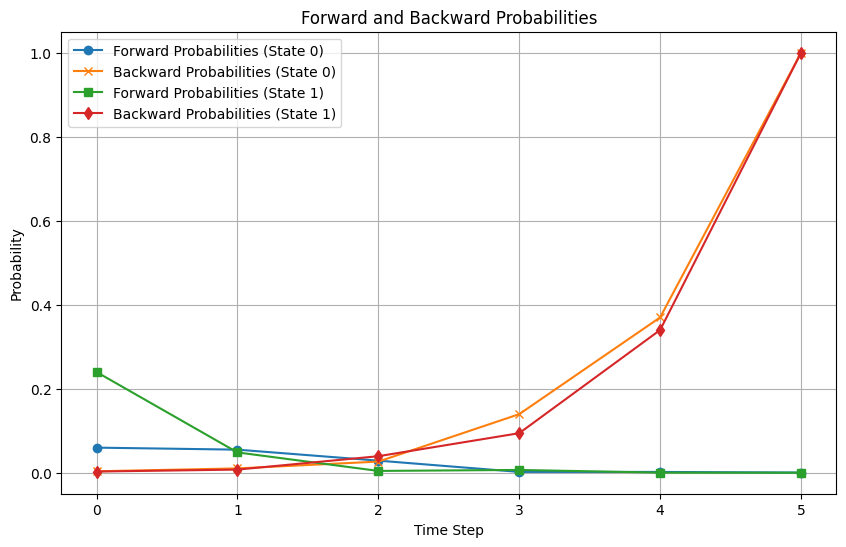

In [ ]:
# Plot the forward and backward probabilities
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(obs_seq)), forward_probs[:, 0], label='Forward Probabilities (State 0)', marker='o')
plt.plot(np.arange(len(obs_seq)), backward_probs[:, 0], label='Backward Probabilities (State 0)', marker='x')
plt.plot(np.arange(len(obs_seq)), forward_probs[:, 1], label='Forward Probabilities (State 1)', marker='s')
plt.plot(np.arange(len(obs_seq)), backward_probs[:, 1], label='Backward Probabilities (State 1)', marker='d')
plt.xlabel('Time Step')
plt.ylabel('Probability')
plt.title('Forward and Backward Probabilities')
plt.legend()
plt.grid(True)
plt.show()

### Hidden Markov Model - Viterbi

In [ ]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    path = {}

    # Initialization step
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
        path[st] = [st]

    # Recursion step
    for t in range(1, len(obs)):
        V.append({})
        new_path = {}
        for st in states:
            max_prob, prev_st = max((V[t-1][prev_st]["prob"] * trans_p[prev_st][st], prev_st) for prev_st in states)
            V[t][st] = {"prob": max_prob * emit_p[st][obs[t]], "prev": prev_st}
            new_path[st] = path[prev_st] + [st]
        path = new_path

    # Termination step
    max_prob, best_st = max((V[len(obs)-1][st]["prob"], st) for st in states)
    best_path = path[best_st]

    return (max_prob,best_path)

In [ ]:
# Example usage
observations = ["1", "3", "1"]
states = ["hot", "cold"]
start_p = {"hot": 0.8, "cold": 0.2}
trans_p = {
    "hot": {"hot": 0.7, "cold": 0.3},
    "cold": {"hot": 0.4, "cold": 0.6},
}
emit_p = {
    "hot": {"1": 0.2, "2": 0.4, "3": 0.4},
    "cold": {"1": 0.5, "2": 0.4, "3": 0.1},
}

In [ ]:
prob,path = viterbi(observations, states, start_p, trans_p, emit_p)
print(f"Most likely hidden state sequence : {path} and the probability is : {prob}")

Most likely hidden state sequence : ['hot', 'hot', 'cold'] and the probability is : 0.006720000000000001
